<a href="https://colab.research.google.com/github/jsebastianquiroga/Semestre_3/blob/main/DL/ANN_MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img style="float: center; padding-right: 10px;" src="https://www.pikpng.com/pngl/b/467-4670553_universidad-javeriana-esslingen-am-neckar-clipart.png" width="100" height="150">

# Taller ANN

El presente taller es desarrollado para la clase de aprendizaje de maquina.

Se crearán algunos datos randomicos, y se generara una red neural paso a paso, posteriormente se importará el modelo disponible en la libreria de Sklearn, para comprar sus resusltados.

***PRESENTADO POR*** :</P>
**JUAN SEBASTÍAN QUIROGA**

## Creación de datos aleatorios.

In [ ]:
# Se importan las librerias a ser usadas.
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Se crea una matriz de 3x4, de 1 y 0.

In [ ]:
X = np.array([[1, 0, 0, 0], [1, 0, 1, 1], [0, 1, 0, 1]])
print("Input:\n", X)
print("\nShape of Input:", X.shape)

Input:
 [[1 0 0 0]
 [1 0 1 1]
 [0 1 0 1]]

Shape of Input: (3, 4)


Se traspone la matriz creada.

In [ ]:
X = X.T
print("Input in matrix form:\n", X)
print("\nShape of Input Matrix:", X.shape)

Input in matrix form:
 [[1 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]]

Shape of Input Matrix: (4, 3)


Se crea otra matiz de 1x3, y se trasnpone tambien.

In [ ]:
y = np.array([[1], [1], [0]])
print("Actual Output:\n", y)
y = y.T
print("\nOutput in matrix form:\n", y)
print("\nShape of Output:", y.shape)

Actual Output:
 [[1]
 [1]
 [0]]

Output in matrix form:
 [[1 1 0]]

Shape of Output: (1, 3)


## Creación modelo ANN 

El modelo a crear, constará de una capa de entrada de 4 neuronas, 1 capa oculta y 1 capa de salidad. (ya que solo se cuenta con dos clases en este ejemplo).

In [ ]:
inputLayer_neurons = X.shape[0] 
hiddenLayer_neurons = 3  
outputLayer_neurons = 1  

Se le asigan pesos aleatorios a la capa de entrada y la capa oculta.

Estos valores, seran uniformes.

In [ ]:
weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))
weights_hidden_output = np.random.uniform(
    size=(hiddenLayer_neurons, outputLayer_neurons))
weights_input_hidden.shape, weights_hidden_output.shape

((4, 3), (3, 1))

Se usara la función sigmoide como la función de activación de la red.

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Se traspone la matriz de pesos, con su asignación randomica, para poder realizar el producto punto entre esta y la matriz X(ya transpuesta previamente).

Se asigna la función sigmoide como función de activación.

In [ ]:
hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)

Se define la función de costo, la cual sera el 'squared error loss'

In [ ]:
outputLayer_linearTransform= np.dot(weights_hidden_output.T, hiddenLayer_activations)
output = sigmoid(outputLayer_linearTransform)

In [ ]:
error = np.square(y - output) / 2
print(error)
error_wrt_output = -(y - output)

[[0.05416239 0.03481739 0.25452685]]


Se transforma, las redes con la función de activación,

In [ ]:
output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))
outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations
error_wrt_output.shape, output_wrt_outputLayer_LinearTransform.shape, outputLayer_LinearTransform_wrt_weights_hidden_output.shape

((1, 3), (1, 3), (3, 3))

In [ ]:
print('Los pesos de las redes ocultas',weights_hidden_output.shape)

Los pesos de las redes ocultas (3, 1)


Se realiza las primeras predicciones, para entrenar la red con el metodo forward propagation.

In [ ]:
error_wrt_weights_hidden_output = np.dot(
    outputLayer_LinearTransform_wrt_weights_hidden_output,
    (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,
)
error_wrt_weights_hidden_output.shape
error_wrt_output = -(y - output)
output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))
outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(
    hiddenLayer_activations, (1 - hiddenLayer_activations)
)
hiddenLayer_linearTransform_wrt_weights_input_hidden = X
print(
    error_wrt_output.shape,
    output_wrt_outputLayer_LinearTransform.shape,
    outputLayer_LinearTransform_wrt_hiddenLayer_activations.shape,
    hiddenLayer_activations_wrt_hiddenLayer_linearTransform.shape,
    hiddenLayer_linearTransform_wrt_weights_input_hidden.shape,
)

(1, 3) (1, 3) (3, 1) (3, 3) (4, 3)


In [ ]:
print('Dimención de la matriz de pesos de las redes, en su capa oculta',weights_input_hidden.shape)

Dimención de la matriz de pesos de las redes, en su capa oculta (4, 3)


In [ ]:
error_wrt_weights_input_hidden = np.dot(
    hiddenLayer_linearTransform_wrt_weights_input_hidden,
    (
        hiddenLayer_activations_wrt_hiddenLayer_linearTransform
        * np.dot(
            outputLayer_LinearTransform_wrt_hiddenLayer_activations,
            (output_wrt_outputLayer_LinearTransform * error_wrt_output),
        )
    ).T,
)
lr = 0.01
print('Vector de los errores producidos por la red neuronal, tras su primera epoc.')
print('---------------------------------------')
weights_hidden_outputlr = 0.01
weights_hidden_output

Vector de los errores producidos por la red neuronal, tras su primera epoc.
---------------------------------------


array([[0.35112689],
       [0.52761664],
       [0.31355352]])

In [ ]:
print('Vector entrada, con los pesos de la capa oculta')
print('---------------------------------------')
weights_input_hidden

Vector entrada, con los pesos de la capa oculta
---------------------------------------


array([[0.11700404, 0.6819408 , 0.24497157],
       [0.1986537 , 0.61931128, 0.17174676],
       [0.68246594, 0.38110641, 0.90238555],
       [0.72552167, 0.90747443, 0.8007738 ]])

In [ ]:
print('Vector de salida, con los pesos de la capa oculta')
print('---------------------------------------')
weights_hidden_output

Vector de salida, con los pesos de la capa oculta
---------------------------------------


array([[0.35112689],
       [0.52761664],
       [0.31355352]])

In [ ]:
lr = 0.01
weights_hidden_output = weights_hidden_output - lr * error_wrt_weights_hidden_output
weights_input_hidden = weights_input_hidden - lr * error_wrt_weights_input_hidden
print('Vector de salida, con los pesos de la capa oculta, despues de el learning rate de 1%.')
print('---------------------------------------')
weights_hidden_output

Vector de salida, con los pesos de la capa oculta, despues de el learning rate de 1%.
---------------------------------------


array([[0.35088831],
       [0.52735095],
       [0.31335146]])

In [ ]:
print('Vector de los pesos despues del primer entrenamiento con el lr.')
print('---------------------------------------')
weights_input_hidden

Vector de los pesos despues del primer entrenamiento con el lr.
---------------------------------------


array([[0.11709403, 0.68205536, 0.24504524],
       [0.19854954, 0.61919845, 0.17165571],
       [0.68249236, 0.38113545, 0.9024031 ],
       [0.72544393, 0.90739064, 0.80070029]])

Se entrenara el modelo hasta con 1000 interacciones, con un learning rate de 0.1;lo que suceda primero.

In [ ]:
inputLayer_neurons = X.shape[0]  # number of features in data set
hiddenLayer_neurons = 3  # number of hidden layers neurons
outputLayer_neurons = 1  # number of neurons at output layer

# initializing weight
weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))
weights_hidden_output = np.random.uniform(
    size=(hiddenLayer_neurons, outputLayer_neurons)
)

# defining the parameters
lr = 0.1
epochs = 1000

losses = []
for epoch in range(epochs):
    ## Forward Propogation

    # calculating hidden layer activations
    hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
    hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)

    # calculating the output
    outputLayer_linearTransform = np.dot(
        weights_hidden_output.T, hiddenLayer_activations
    )
    output = sigmoid(outputLayer_linearTransform)

    ## Backward Propagation

    # calculating error
    error = np.square(y - output) / 2

    # calculating rate of change of error w.r.t weight between hidden and output layer
    error_wrt_output = -(y - output)
    output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))
    outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations

    error_wrt_weights_hidden_output = np.dot(
        outputLayer_LinearTransform_wrt_weights_hidden_output,
        (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,
    )

    # calculating rate of change of error w.r.t weights between input and hidden layer
    outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
    hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(
        hiddenLayer_activations, (1 - hiddenLayer_activations)
    )
    hiddenLayer_linearTransform_wrt_weights_input_hidden = X
    error_wrt_weights_input_hidden = np.dot(
        hiddenLayer_linearTransform_wrt_weights_input_hidden,
        (
            hiddenLayer_activations_wrt_hiddenLayer_linearTransform
            * np.dot(
                outputLayer_LinearTransform_wrt_hiddenLayer_activations,
                (output_wrt_outputLayer_LinearTransform * error_wrt_output),
            )
        ).T,
    )

    # updating the weights
    weights_hidden_output = weights_hidden_output - lr * error_wrt_weights_hidden_output
    weights_input_hidden = weights_input_hidden - lr * error_wrt_weights_input_hidden

    # print error at every 100th epoch
    epoch_loss = np.average(error)
    if epoch % 100 == 0:
        print(f"Error at epoch {epoch} is {epoch_loss:.5f}")

    # appending the error of each epoch
    losses.append(epoch_loss)

Error at epoch 0 is 0.11583
Error at epoch 100 is 0.10974
Error at epoch 200 is 0.10453
Error at epoch 300 is 0.09523
Error at epoch 400 is 0.07854
Error at epoch 500 is 0.05779
Error at epoch 600 is 0.04012
Error at epoch 700 is 0.02794
Error at epoch 800 is 0.02016
Error at epoch 900 is 0.01518


In [ ]:
print('Vector de los pesos de entrada de la capa oculta de la red neuronal despues de su entrenamiento con los paramentos propuesto.')
print('---------------------------------------')
weights_input_hidden

Vector de los pesos de entrada de la capa oculta de la red neuronal despues de su entrenamiento con los paramentos propuesto.
---------------------------------------


array([[ 0.47914446,  2.296377  ,  0.49200674],
       [ 0.61809509, -1.80368568,  0.75757379],
       [ 0.19585925,  1.05823708,  0.50918788],
       [ 1.11340412, -0.9279039 ,  0.69169074]])

In [ ]:
print('Vector de los pesos de salida de la capa oculta de la red neuronal despues de su entrenamiento con los paramentos propuesto.')
print('---------------------------------------')
weights_hidden_output

Vector de los pesos de salida de la capa oculta de la red neuronal despues de su entrenamiento con los paramentos propuesto.
---------------------------------------


array([[-1.08693267],
       [ 3.73406789],
       [-0.82207785]])

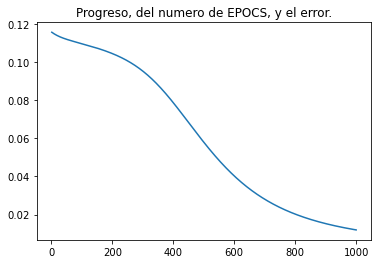

In [ ]:
plt.title('Progreso, del numero de EPOCS, y el error.')
plt.plot(np.arange(1, epochs + 1), np.array(losses))

In [ ]:
print('Label predicho por el modelo:',y)
print('Probabilidad predicho por el modelo:',output)

Label predicho por el modelo: [[1 1 0]]
Probabilidad predicho por el modelo: [[0.90112878 0.8586826  0.2043264 ]]


Con el entrenamiento, realizado el modelo predice que las dos primerow valores son 1, con probabilidades del 94%, 90% y de 15%, de que lo sean.

## Modelo Sklearn
Con los mismos datos, con que fue entrenada la red neuronal anterios, se procedera a recrear el mismo ejercicio pero esta vez, mediante la libreria conocida, de sklearn.

Se necesitara retomar las matrices a su forma original, para que sea tomada por el modelo.

Se entrena una red neuronal, con 3 capas ocultas, funcion de activación logistica, debido a que se quiere comparar con el modelo propio, y en esa ocacion se utilizo la sigmoide, se tendran hasta 1000 epocs y se establece una semilla para replicabilidad, se entrena el modelo con valores de X y Y, igual que en el ejercicio pasado, con la totalidad de sus datos.

In [ ]:
x = X.T
y= y.T
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=3,activation='logistic', 
                    max_iter=1000, random_state=1).fit(x,y)
print("Probabilidades de pertenecer a 1 de sklearn:", clf.predict_proba(x[:])[:,1])
print("Probabilidades de pertenecer a 1 de modelo realizado:",output)
print("Label predicho por modelo sklearn:",clf.predict(x))
print("Label predicho por modelo realizado:",y.T)

/Users/juanquiroga/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Probabilidades de pertenecer a 1 de sklearn: [0.85655131 0.85045292 0.48835082]
Probabilidades de pertenecer a 1 de modelo realizado: [[0.90112878 0.8586826  0.2043264 ]]
Label predicho por modelo sklearn: [1 1 0]
Label predicho por modelo realizado: [[1 1 0]]


/Users/juanquiroga/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Al comparar las dos salidas del modelo, tanto la probabilidad y el label, es similar.

Solo si a la probabilidad predicha por medio del modelo de sklearn, se coloca como punto de corte de 0,4, prediceria todas como 1, generando error en esta predicción.

Este modelo, es mas parsimonioso en terminos de codificación por lo que se continuara con este mismo, el de sklearn.

## Modelo de Kaggel

Se pondra en practica el anterior modelo con unos datos, de un data set proveniente de kaggel.
https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling?resource=download

Este modelo busca predecir el churn, de unos clientes en 4 paises distintos.

Es información financiera, son 10000 observaciones con 18 variables de estas.

Se importa de un csv, ya que es el formato que se descarga del link relacionado.

Este data set, tiene 4 variables identificadoras, como lo son el apellido, el numero de la fila, el id del cliente, por eso se removeran.

Se divide esta matriz entre los predictores y la variable de respuesta, x, y.

In [ ]:
data = pd.read_csv('Churn_Modelling.csv')
data = data.drop('Surname', axis=1)
x = data.drop(['Exited','CustomerId', 'CustomerId', 'RowNumber'], axis=1)
y = data['Exited']
y

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
x

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

Se observa que los datos, no estan en la misma escala, y hay variables categorica, no son tantas clases de estas.

4 de paises, y el sexo son 2, por lo que se dumificaran, y se escalara las variables predictoras.

In [ ]:
x = pd.get_dummies(x)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_scale = scaler.transform(x)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


Se divide en dos la base de datos, entre 67% de entrenamiento, de los pesos de la red neuronal,  y el 33% para predecirlo con este modelo entrenado.

Se entrena el modelo, con las mismas condiciones del modelo anterios, para comparitividad con los demas modelos.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.33, random_state=42)
clf = MLPClassifier(hidden_layer_sizes=3,activation='logistic', 
                    max_iter=1000, random_state=1).fit(X_train,y_train)

In [ ]:
print('La precision de la prediccion de los contra el valor verdadero en test.') 
print('-------------------------------------------------------------------------')
clf.score(X_test, y_test)

La precision de la prediccion de los contra el valor verdadero en test.
-------------------------------------------------------------------------


0.8390909090909091

In [ ]:
from sklearn import metrics

y_pred = clf.predict(X_test)

tp, fn, fp, tn = metrics.confusion_matrix(y_test,y_pred,labels=[1,0]).reshape(-1)
print(' tp fn fp tn\n', tp, fn, '',fp, '',tn)

print(metrics.classification_report(y_test, y_pred,labels=[1,0]))

 tp fn fp tn
 216 427  104  2553
              precision    recall  f1-score   support

           1       0.68      0.34      0.45       643
           0       0.86      0.96      0.91      2657

    accuracy                           0.84      3300
   macro avg       0.77      0.65      0.68      3300
weighted avg       0.82      0.84      0.82      3300



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score

print(f'Precision: {accuracy_score(y_test,y_pred)}')
print(f'Matriz de confusion: \n{confusion_matrix(y_test, y_pred)}')
print(f'AUC: {roc_auc_score(y_test, y_pred)}')
print(f'Tasa de Recall: {recall_score(y_test,y_pred)}')

Precision: 0.8390909090909091
Matriz de confusion: 
[[2553  104]
 [ 427  216]]
AUC: 0.6483917302866748
Tasa de Recall: 0.3359253499222395


Este modelo demostro que sin mayor transformación se logra tener un AUC del 64%.
El modelo es muy preciso, lo que quiere decir que tiene mas falsos positivos.
y tiene una precision para la prediccion de la no churn.

Este modelo de forma parcimoniosa permite tener buenos resultados.